In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve
from sklearn.inspection import PartialDependenceDisplay

### Load train and test data

In [2]:
# Load split datasets
X_train = joblib.load("preprocessed_data/X_train_preprocessed.pkl")
X_test  = joblib.load("preprocessed_data/X_test_preprocessed.pkl")
y_train = joblib.load("preprocessed_data/y_train_preprocessed.pkl")
y_test  = joblib.load("preprocessed_data/y_test_preprocessed.pkl")

In [3]:
X_train.head().T

,1610,1941,3472,3187,1538
Quantity in Stock (liters/kg),1.297298,2.540548,-0.894271,0.022286,-0.590264
Minimum Stock Threshold (liters/kg),-0.903029,0.281865,1.668304,0.863288,-1.152929
Reorder Quantity (liters/kg),0.502096,-0.932329,-0.555485,1.764850,0.058844
Shelf Life (days),-0.604419,-0.804807,-0.437430,2.868965,-0.504226
Total Land Area (acres),1.021630,-0.754196,-1.174528,-0.940240,1.151636
Number of Cows,0.901309,-1.521682,0.471423,-0.544670,-1.717085
Quantity_per_Cow,-0.331202,-0.742345,-0.574315,-0.091510,0.898323
Sales_Efficiency,-0.533925,-1.589912,0.466660,-0.158704,0.070186
Production_Density,-0.153503,3.070231,-0.799053,-0.045255,0.998066
Price_to_ShelfLife_Ratio,-0.173625,0.224003,-0.330397,-0.472519,0.098666


In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3229 entries, 1610 to 3174
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Quantity in Stock (liters/kg)        3229 non-null   float64
 1   Minimum Stock Threshold (liters/kg)  3229 non-null   float64
 2   Reorder Quantity (liters/kg)         3229 non-null   float64
 3   Shelf Life (days)                    3229 non-null   float64
 4   Total Land Area (acres)              3229 non-null   float64
 5   Number of Cows                       3229 non-null   float64
 6   Quantity_per_Cow                     3229 non-null   float64
 7   Sales_Efficiency                     3229 non-null   float64
 8   Production_Density                   3229 non-null   float64
 9   Price_to_ShelfLife_Ratio             3229 non-null   float64
 10  Reorder_Intensity                    3229 non-null   float64
 11  Production_to_ShelfLife         

In [5]:
dairy_final = joblib.load("data/dairy_final.pkl")
dairy_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4037 entries, 0 to 4036
Data columns (total 59 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Quantity in Stock (liters/kg)        4037 non-null   float64
 1   Minimum Stock Threshold (liters/kg)  4037 non-null   float64
 2   Reorder Quantity (liters/kg)         4037 non-null   float64
 3   Shelf Life (days)                    4037 non-null   float64
 4   Total Land Area (acres)              4037 non-null   float64
 5   Number of Cows                       4037 non-null   float64
 6   Quantity_per_Cow                     4037 non-null   float64
 7   Sales_Efficiency                     4037 non-null   float64
 8   Production_Density                   4037 non-null   float64
 9   Price_to_ShelfLife_Ratio             4037 non-null   float64
 10  Reorder_Intensity                    4037 non-null   float64
 11  Production_to_ShelfLife       

In [6]:
datapath = './data/dairy_data_features.csv'
dairy_features = pd.read_csv(datapath)

dairy_features.head()

,Year,Quarter,Product Name,Brand,Sales Channel,Storage Condition,Customer Location,Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),...,Shelf Life (days),Total Land Area (acres),Number of Cows,Quantity_per_Cow,Sales_Efficiency,Production_Density,Price_to_ShelfLife_Ratio,Reorder_Intensity,Production_to_ShelfLife,Land_Productivity
0,2019,Q1,Butter,Amul,Online,Frozen,Rajasthan,10486.84,32.0,17.37,...,39.0,385.570,65.0,4.123077,0.891194,4.626462,1.003333,0.432276,7.710769,0.779936
1,2019,Q1,Butter,Amul,Retail,Frozen,Karnataka,17627.66,378.5,80.74,...,36.5,523.725,39.0,5.487179,0.440266,12.463333,1.551096,0.422967,13.316986,0.928102
2,2019,Q1,Butter,Amul,Retail,Frozen,Uttar Pradesh,2029.06,8.0,27.10,...,29.0,672.520,32.0,0.687500,0.716846,0.959063,3.180345,1.005000,1.058276,0.045634
3,2019,Q1,Butter,Amul,Retail,Refrigerated,Bihar,10801.28,39.0,12.52,...,25.0,612.820,80.0,1.400000,0.740888,1.889625,3.857600,1.466250,6.046800,0.246679
4,2019,Q1,Butter,Amul,Wholesale,Frozen,Jharkhand,23175.60,110.0,82.68,...,36.0,347.340,46.0,5.391304,0.692061,7.790217,2.595833,0.419677,9.954167,1.031698


### LinearRegression

In [7]:
# Define pipeline
pipe = make_pipeline(
    #StandardScaler(),
    SelectKBest(score_func=f_regression),
    LinearRegression()
)

In [8]:
# Define hyperparameter grid for SelectKBest
k_values = [k+1 for k in range(len(X_train.columns))]
param_grid = {'selectkbest__k': k_values}

In [9]:
# Run GridSearchCV to find optimal number of features (k)
lr_grid_cv = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
lr_grid_cv.fit(X_train, y_train)

print(" Best Params:", lr_grid_cv.best_params_)
print("Best CV R²:", lr_grid_cv.best_score_)

 Best Params: {'selectkbest__k': 57}
Best CV R²: 0.5166991786054478


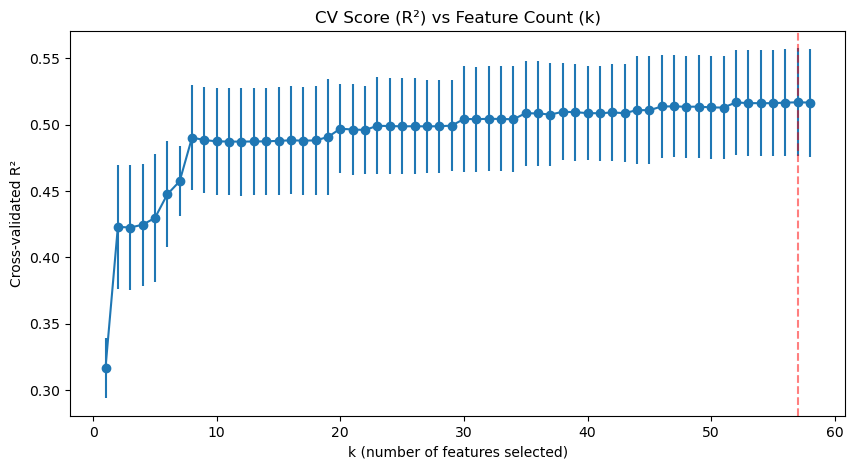

In [10]:
# Visualize cross-validation scores across k values
cv_results = lr_grid_cv.cv_results_
score_mean = cv_results['mean_test_score']
score_std = cv_results['std_test_score']
cv_k = cv_results['param_selectkbest__k']

plt.figure(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std, fmt='-o')
plt.axvline(x=lr_grid_cv.best_params_['selectkbest__k'], color='r', ls='--', alpha=0.5)
plt.xlabel('k (number of features selected)')
plt.ylabel('Cross-validated R²')
plt.title('CV Score (R²) vs Feature Count (k)')
plt.show()

In [11]:
# Get coefficients of best model
selected_features = lr_grid_cv.best_estimator_.named_steps['selectkbest'].get_support()
coefs = lr_grid_cv.best_estimator_.named_steps['linearregression'].coef_
features = X_train.columns[selected_features]

coef_series = pd.Series(coefs, index=features).sort_values(ascending=False)
print("✅ Feature Coefficients (descending order):")
display(coef_series)

✅ Feature Coefficients (descending order):


Quantity_per_Cow                        8053.293076
Storage Condition_Tetra Pack            7899.682191
Sales_Efficiency                        7331.167127
Price_to_ShelfLife_Ratio                4729.362073
Quantity in Stock (liters/kg)           3778.226130
Product Name_Ghee                       2655.870951
Number of Cows                          2417.101817
Storage Condition_Refrigerated          2332.764550
Brand_Warana                            1831.661779
Storage Condition_Frozen                1821.824211
Production_to_ShelfLife                 1341.704767
Customer Location_Maharashtra           1181.032510
Sales Channel_Retail                    1014.021890
Land_Productivity                        774.801089
Year_2022                                594.504449
Brand_Mother Dairy                       442.848966
Product Name_Cheese                      408.337987
Total Land Area (acres)                  358.053597
Customer Location_Kerala                 345.643031
Year_2021   

In [12]:
# All feature names
all_features = X_train.columns

# Selected features (already calculated)
selected = features

# Columns that were removed
dropped = all_features.difference(selected)

print("🟥 Dropped Columns (not selected by SelectKBest):")
display(pd.Series(dropped))

🟥 Dropped Columns (not selected by SelectKBest):


0    Customer Location_Delhi
dtype: object

In [13]:
# Evaluate model performance
# --- Cross-validated performance (MAE) ---
lr_neg_mae = cross_validate(
    lr_grid_cv.best_estimator_,
    X_train,
    y_train,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1
)
lr_mae_mean = -np.mean(lr_neg_mae['test_score'])
lr_mae_std = np.std(-lr_neg_mae['test_score'])

# --- Test set performance ---
y_test_pred = lr_grid_cv.best_estimator_.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Linear Regression Performance Summary")
print(f"Cross-validated MAE: {lr_mae_mean:.2f} ± {lr_mae_std:.2f}")
print(f"Test R²: {test_r2:.3f}")
print(f"Test MAE: {test_mae:.2f}")

Linear Regression Performance Summary
Cross-validated MAE: 7610.17 ± 353.07
Test R²: 0.527
Test MAE: 7353.60


### Random Forest Model

In [14]:
# Define pipeline
RF_pipe = make_pipeline(
    RandomForestRegressor(random_state=47)
)

In [15]:
# Hyperparameter search using GridSearchCV
n_estimators = [int(n) for n in np.linspace(50, 500, 10)]
max_depth = [None, 5, 10, 20]
min_samples_split = [2, 5, 10]

grid_params = {
    'randomforestregressor__n_estimators': n_estimators,
    'randomforestregressor__max_depth': max_depth,
    'randomforestregressor__min_samples_split': min_samples_split
}

grid_params

{'randomforestregressor__n_estimators': [50,
  100,
  150,
  200,
  250,
  300,
  350,
  400,
  450,
  500],
 'randomforestregressor__max_depth': [None, 5, 10, 20],
 'randomforestregressor__min_samples_split': [2, 5, 10]}

In [16]:
# Run GridSearchCV
rf_grid_cv = GridSearchCV(
    RF_pipe,
    param_grid=grid_params,
    cv=5,
    n_jobs=-1,
    scoring='r2'
)

rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 5, 10, 20],
                         'randomforestregressor__min_samples_split': [2, 5, 10],
                         'randomforestregressor__n_estimators': [50, 100, 150,
                                                                 200, 250, 300,
                                                                 350, 400, 450,
                                                                 500]},
             scoring='r2')

In [17]:
# Best parameters and CV score
print("Best params:", rf_grid_cv.best_params_)
print("Best CV R²:", rf_grid_cv.best_score_)

Best params: {'randomforestregressor__max_depth': 20, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 450}
Best CV R²: 0.8539852064298146


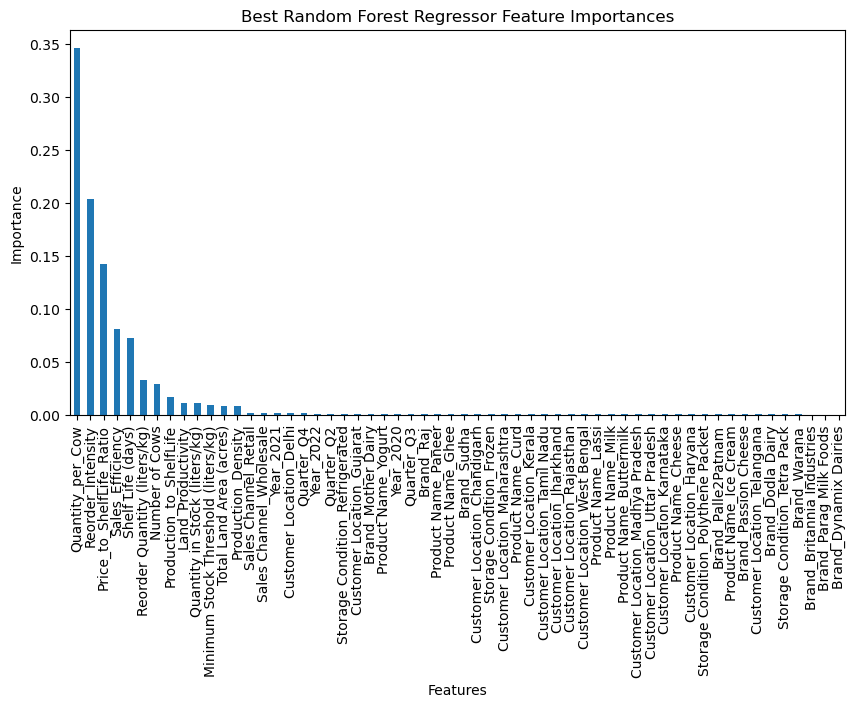

In [18]:
# Feature importance
imps = rf_grid_cv.best_estimator_.named_steps['randomforestregressor'].feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)

rf_feat_imps.plot(kind='bar', figsize=(10,5))
plt.title('Best Random Forest Regressor Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [19]:
# Performance assessment (cross-validation MAE)
rf_neg_mae = cross_validate(
    rf_grid_cv.best_estimator_,
    X_train,
    y_train,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1
)

# Calculate mean and std (convert to positive)
rf_mae_mean = -np.mean(rf_neg_mae['test_score'])
rf_mae_std = np.std(-rf_neg_mae['test_score'])

# Calculate test MAE
test_mae = mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

# Test set performance 
y_test_pred = rf_grid_cv.best_estimator_.predict(X_test)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results clearly
print("Random Forest Model Performance")
print(f"Cross-validated MAE: {rf_mae_mean:,.2f} ± {rf_mae_std:,.2f}")
print(f"Test MAE: {test_mae:,.2f}")
print(f"Test R²: {test_r2:.3f}")

Random Forest Model Performance
Cross-validated MAE: 3,632.37 ± 168.24
Test MAE: 3,495.11
Test R²: 0.866


### Gradient Boosting Regressor (GBR)

In [20]:
# Define a GBR pipeline
gbr_pipe = make_pipeline(
    GradientBoostingRegressor(random_state=47)
)

In [21]:
# Create a hyperparameter grid (light tuning)
gbr_params = {
    'gradientboostingregressor__n_estimators': [100, 200, 300],
    'gradientboostingregressor__learning_rate': [0.01, 0.05, 0.1],
    'gradientboostingregressor__max_depth': [2, 3, 4]
}

In [22]:
# Run GridSearchCV
gbr_grid = GridSearchCV(
    gbr_pipe,
    gbr_params,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

gbr_grid.fit(X_train, y_train)

print("Best GBR Parameters:", gbr_grid.best_params_)
print("Best GBR CV Score (neg MAE):", gbr_grid.best_score_)

Best GBR Parameters: {'gradientboostingregressor__learning_rate': 0.1, 'gradientboostingregressor__max_depth': 4, 'gradientboostingregressor__n_estimators': 300}
Best GBR CV Score (neg MAE): -2588.8688718538206


In [23]:
# Evaluate on Test Set
gbr_cv = cross_validate(
    gbr_grid.best_estimator_,
    X_train,
    y_train,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1
)

gbr_mae_mean = -np.mean(gbr_cv['test_score'])
gbr_mae_std = np.std(gbr_cv['test_score'])

# --- Test set performance ---
y_pred = gbr_grid.best_estimator_.predict(X_test)

gbr_test_mae = mean_absolute_error(y_test, y_pred)
gbr_test_r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor Performance")
print(f"Cross-validated MAE: {gbr_mae_mean:.2f} ± {gbr_mae_std:.2f}")
print(f"Test MAE: {gbr_test_mae:.2f}")
print(f"Test R²:  {gbr_test_r2:.3f}")

Gradient Boosting Regressor Performance
Cross-validated MAE: 2588.87 ± 114.13
Test MAE: 2538.40
Test R²:  0.924


### Final Model Selection

After training and evaluating three regression models —
Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor —
I selected Gradient Boosting Regressor as the final model.

### Why Gradient Boosting?

I compared the models using the following criteria:

1. Cross-validated MAE (Primary Metric)

Gradient Boosting achieved the lowest cross-validated MAE (2588.87 ± 114.13), meaning it consistently produced the smallest prediction errors across folds, compared to Linear Regression and Random Forest (higher than Gradient Boosting).

2. Test MAE

On the hold-out test set, Gradient Boosting again showed the lowest MAE (2538.40), confirming that it generalizes better than Linear Regression and Random Forest.

3. Test R² Score

Gradient Boosting achieved the highest R² ( 0.924), indicating that it explains the largest proportion of variance in the target variable, compared to Linear Regression and Random Forest.

4. Stability and Robustness

The performance gap between Gradient Boosting’s cross-validated MAE (2588.87) and test MAE (2538.40) is small, suggesting low variance and good stability.

#### Conclusion:

Gradient Boosting Regressor is selected as the final model because it provides:

the lowest overall prediction error,

the strongest ability to capture nonlinear relationships in the data,

the best generalization to unseen data, and

superior performance across all regression metrics used in this project.

This model will be used for final interpretation and feature importance analysis.

### Gradient Boosting Model Quality

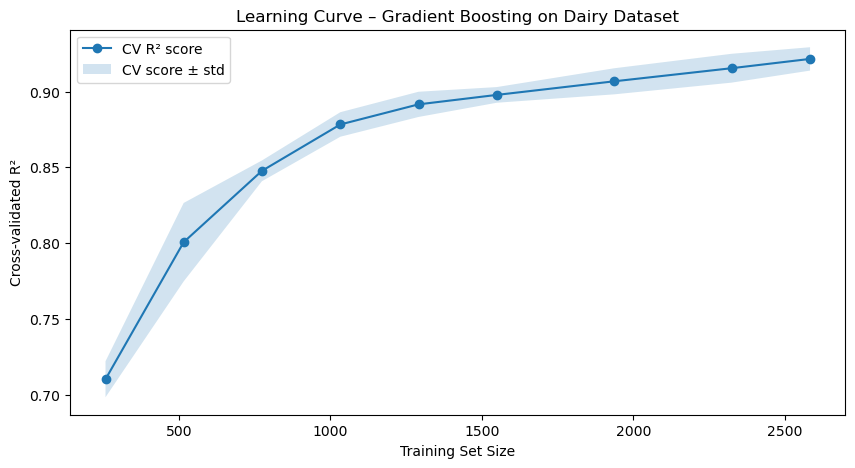

In [24]:
# Use the best model from your Gradient Boosting GridSearchCV
gbr_best = gbr_grid.best_estimator_

# Fractions of training data
fractions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.75, 0.9, 1.0]

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=gbr_best,
    X=X_train,
    y=y_train,
    train_sizes=fractions,
    cv=5,
    scoring='r2'
)

# Compute mean & std
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, test_mean, label="CV R² score", marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                 alpha=0.2, label="CV score ± std")

plt.xlabel("Training Set Size")
plt.ylabel("Cross-validated R²")
plt.title("Learning Curve – Gradient Boosting on Dairy Dataset")
plt.legend()
plt.show()


Overall conclusion:

The learning curve shows that Gradient Boosting improves steadily as more data is added. With small training sizes, performance starts around R² ≈ 0.71, but increases quickly and stabilizes around R² ≈ 0.92 once the full dataset is used. The validation curve remains consistently below the training curve with a small gap, indicating low overfitting and good generalization. The narrow confidence band suggests the model is stable across folds. Overall, the curve confirms that Gradient Boosting is well-fit to this dataset, benefits from larger training sizes, and is suitable as the final model.

### Extract Feature Importance from Gradient Boosting

In [25]:
# Get feature importance values
gbr_importances = gbr_grid.best_estimator_.named_steps['gradientboostingregressor'].feature_importances_

# Link them to feature names
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": gbr_importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df.head(15)

,Feature,Importance
6,Quantity_per_Cow,0.311456
10,Reorder_Intensity,0.270156
9,Price_to_ShelfLife_Ratio,0.137809
3,Shelf Life (days),0.088289
7,Sales_Efficiency,0.074986
2,Reorder Quantity (liters/kg),0.050325
5,Number of Cows,0.032774
11,Production_to_ShelfLife,0.010451
0,Quantity in Stock (liters/kg),0.005458
12,Land_Productivity,0.002735


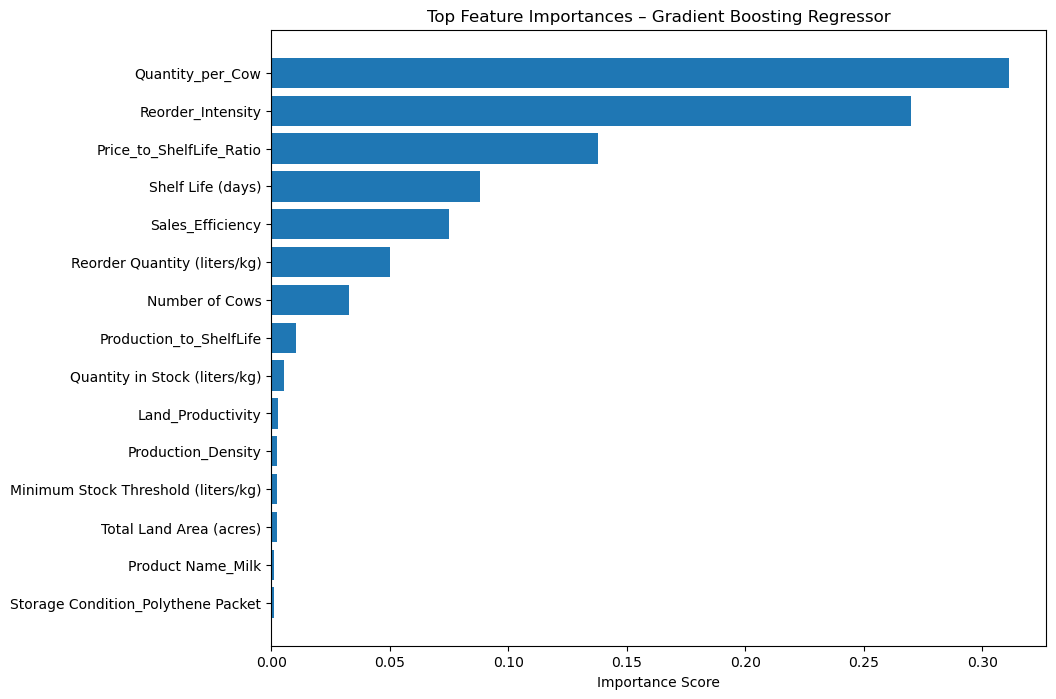

In [26]:
# Plot Feature Importance
plt.figure(figsize=(10, 8))
top_n = 15
plt.barh(feature_importance_df['Feature'].head(top_n),
         feature_importance_df['Importance'].head(top_n))
plt.gca().invert_yaxis()
plt.title("Top Feature Importances – Gradient Boosting Regressor")
plt.xlabel("Importance Score")
plt.show()

### Business Interpretation of Top 3 Revenue Drivers

#### Quantity_per_Cow — Primary Driver of Revenue

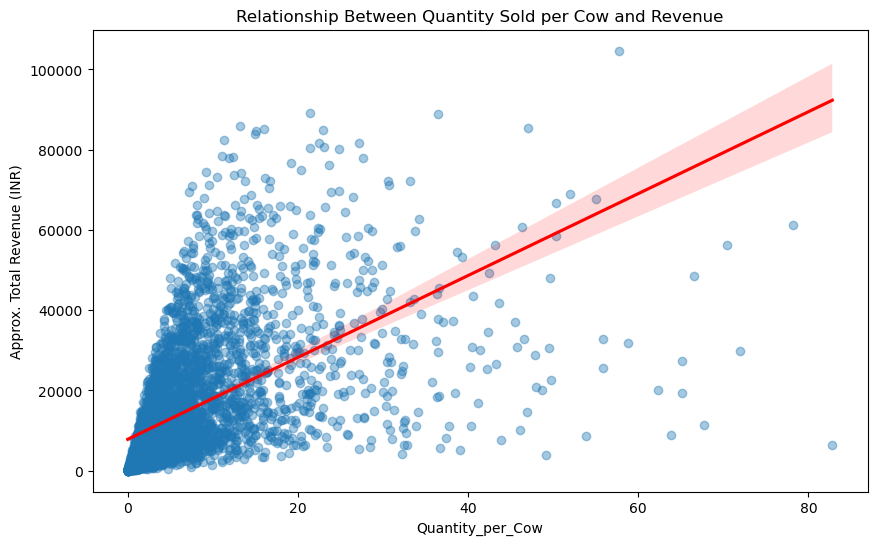

In [27]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=dairy_features,
    x='Quantity_per_Cow',
    y='Approx. Total Revenue(INR)',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)

plt.title("Relationship Between Quantity Sold per Cow and Revenue")
plt.xlabel("Quantity_per_Cow")
plt.ylabel("Approx. Total Revenue (INR)")
plt.show()

In [28]:
dairy_features['Quantity_per_Cow'].describe()

count    4037.000000
mean        6.615191
std         8.322888
min         0.010000
25%         1.451613
50%         4.000000
75%         8.428571
max        82.800000
Name: Quantity_per_Cow, dtype: float64

In [29]:
dairy_final['Quantity_per_Cow'].corr(dairy_final['Approx. Total Revenue(INR)'])

np.float64(0.5466346489250967)

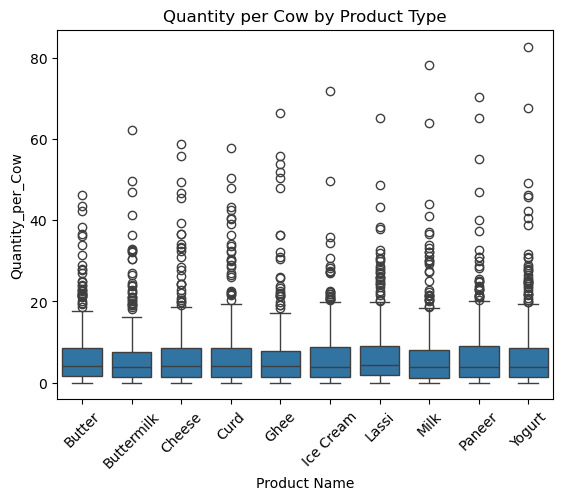

In [30]:
sns.boxplot(data=dairy_features, x='Product Name', y='Quantity_per_Cow')
plt.xticks(rotation=45)
plt.title('Quantity per Cow by Product Type')
plt.show()

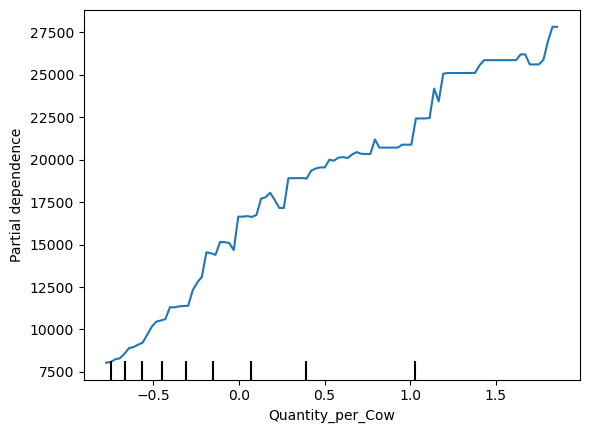

In [31]:
# Show shape and direction of the relationship for Quantity_per_Cow		
PartialDependenceDisplay.from_estimator(gbr_grid.best_estimator_, X_train, ['Quantity_per_Cow'])

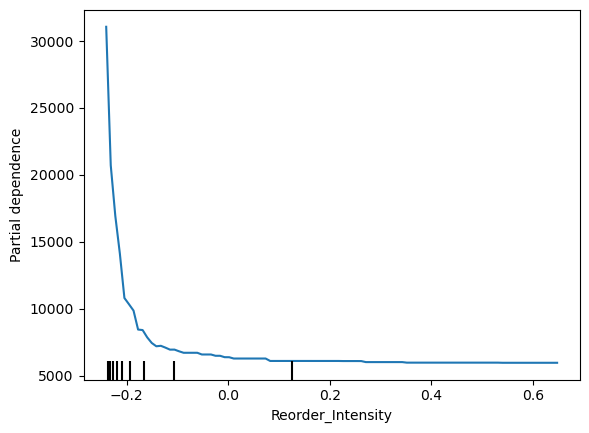

In [32]:
# Show shape and direction of the relationship for Reorder_Intensity	
PartialDependenceDisplay.from_estimator(gbr_grid.best_estimator_, X_train, ['Reorder_Intensity'])

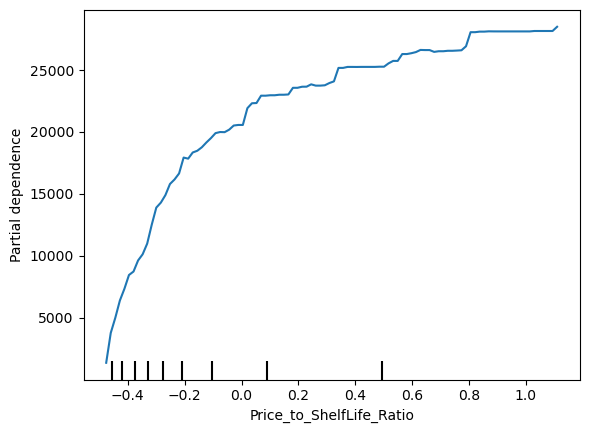

In [33]:
# Show shape and direction of the relationship for Price_to_ShelfLife_Ratio
PartialDependenceDisplay.from_estimator(gbr_grid.best_estimator_, X_train, ['Price_to_ShelfLife_Ratio'])

### Key Insight: Quantity per Cow:

Higher output per cow is a major driver of revenue. Most farms operate around 6–7 units per cow on average (not 1), while top performers reach over 80 units, showing extremely large efficiency differences across suppliers. Productivity varies by product type — raw products like Milk and Yogurt tend to support higher output levels, while processed items such as Ghee or Butter generally show lower and more variable output.

Improving productivity at low-performing farms offers a clear revenue opportunity, and the practices of high-performing farms can be used as benchmarks.

### Overview on the Key Drivers to Revenue:

Revenue in the dairy business is shaped by farm productivity, product demand patterns, and how well pricing aligns with a product’s shelf life. Among all factors, output per cow is the strongest revenue driver, as farms producing more saleable product per cow consistently earn more.

Reorder intensity also plays an important role in revenue, but in the opposite direction: products that require frequent reordering tend to be associated with lower revenue, reflecting lower-value items, shorter shelf lives, or more volatile demand. In contrast, products with a higher price relative to their shelf life generate stronger revenue, as high-value items with longer shelf stability perform better in this dataset.

Overall, the most successful farms and product lines combine high production efficiency, stable and healthy demand, and a favourable price–shelf-life balance. Strengthening these areas offers the most direct path to increasing revenue.

### Modeling Summary
1. Overview of Modeling Approach:

Three regression models were developed to predict revenue: Linear Regression, Random Forest, and Gradient Boosting. Each model was evaluated using cross-validation and assessed on the test set using Mean Absolute Error (MAE) and R², with MAE selected as the primary performance metric.

2. Model Performance Comparison:

Linear Regression served as a baseline but was limited by its linear assumptions.

Random Forest improved significantly by capturing nonlinear patterns and feature interactions.

Gradient Boosting outperformed both alternatives, delivering:

the lowest cross-validated MAE,

the lowest test MAE, and

the highest R² score.

These results indicate that Gradient Boosting not only fits the data well but also generalizes effectively to unseen samples.

3. Final Model Selection:

Based on accuracy, stability, and generalization performance, Gradient Boosting is selected as the final predictive model. Its ability to capture complex relationships in the engineered features makes it the most reliable approach for this dataset.

4. Key Drivers Identified:

Feature importance and partial dependence analysis revealed that revenue is mainly driven by three operational dimensions:

Productivity efficiency — especially Quantity per Cow, which shows a strong positive relationship with revenue and is the most influential factor.

Demand behavior — reflected through Reorder Intensity, which shows a negative relationship with revenue, indicating that products requiring frequent reordering tend to be lower-value or more volatile in demand.

Pricing and shelf-life alignment — measured through the Price-to-ShelfLife Ratio, where higher ratios are associated with higher revenue due to stronger performance of high-value, longer-lasting products.

These insights highlight where improvements can have the largest business impact.